In [1]:
import pandas as pd
import numpy as np
import seaborn as sb; sb.set()
import matplotlib.pyplot as plt

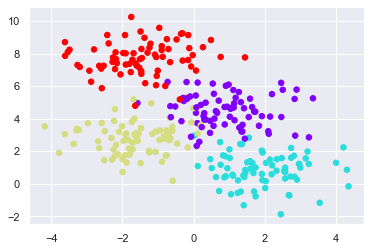

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 300, centers = 4, cluster_std = 1.0, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = 'rainbow')

C:\Users\Oong\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'clim'


[-0.5  0.5  1.5  2.5  3.5]


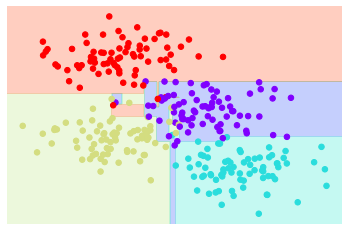

In [55]:
from sklearn.tree import DecisionTreeClassifier

def visualize_classifier(model, X, y, ax = None, cmap = 'rainbow'):
    model.fit(X, y)
    
    ax = ax or plt.gca()
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = cmap, zorder = 3, clim = (y.min(), y.max()))
    ax.axis('tight')
    ax.axis('off')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, 300), np.linspace(*ylim, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y))
    
    contours = ax.contourf(xx, yy, Z, alpha = 0.3, zorder = 1, clim = (y.min(), y.max()), 
                           levels = np.arange(n_classes + 1) - 0.5, cmap = cmap)
    ax.set(xlim = xlim, ylim = ylim)
visualize_classifier(DecisionTreeClassifier(), X, y)

C:\Users\Oong\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'clim'


[-0.5  0.5  1.5  2.5  3.5]


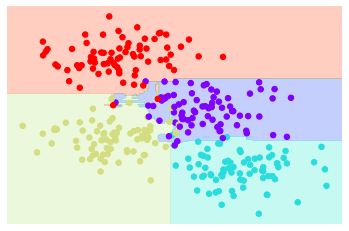

In [58]:
#Bagging Classifier to reduce overfitting
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators = 100, max_samples = 0.8, random_state = 0)
visualize_classifier(bag, X, y)

C:\Users\Oong\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'clim'


[-0.5  0.5  1.5  2.5  3.5]


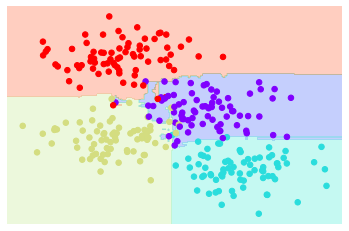

In [59]:
#Random forest to reduce overfitting
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
visualize_classifier(rf, X, y)

<ErrorbarContainer object of 3 artists>

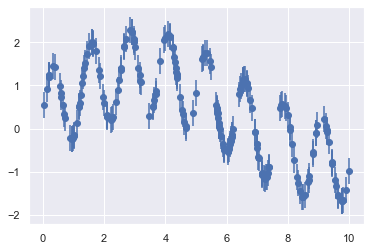

In [65]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rng = np.random.RandomState(0)
x = 10 * rng.rand(200)

def model(x, sigma = 0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    error = sigma * rng.randn(50)
    return fast_oscillation + slow_oscillation + sigma

y = model(x)
plt.errorbar(x, y, 0.3, fmt = 'o')

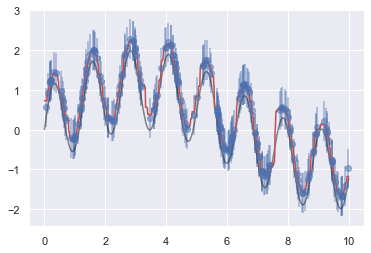

In [73]:
forest = RandomForestRegressor(200)
forest.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
ytrue = model(xfit, sigma = 0)
yfit = forest.predict(xfit[:, None])

plt.errorbar(x, y, 0.5, fmt = 'o', alpha = 0.5)
plt.plot(xfit, ytrue, '-k', alpha = 0.5)
plt.plot(xfit, yfit, '-r')

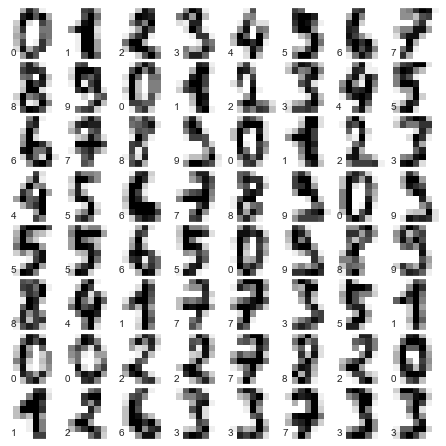

In [100]:
#Classifying Digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

digits = load_digits()
fig = plt.figure(figsize = (6, 6))
plt.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, wspace = 0.05, hspace = 0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(digits.images[i], interpolation = 'nearest', cmap = 'binary')
    ax.text(0, 7, str(digits.target[i]))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.95      0.98      0.97        43
           2       1.00      0.95      0.98        44
           3       1.00      0.98      0.99        45
           4       1.00      0.97      0.99        38
           5       0.96      0.98      0.97        48
           6       1.00      1.00      1.00        52
           7       0.96      1.00      0.98        48
           8       0.98      0.96      0.97        48
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



(10.0, 0.0)

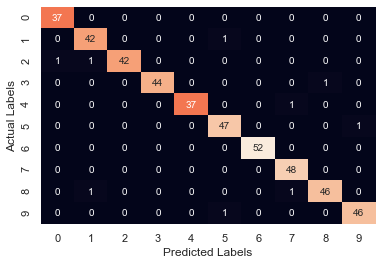

In [98]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state = 0)
rf = RandomForestClassifier(n_estimators = 1000)
ypred = rf.fit(Xtrain, ytrain).predict(Xtest)

print(classification_report(ytest, ypred))

mat = confusion_matrix(ytest, ypred)
ax = sb.heatmap(mat, annot = True, fmt = 'd', cbar = None, square = None)

plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
#ax.set(xlabel = 'Predicted Labels', ylabel = 'Actual Labels')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)